#Paquetes necesarios

In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Carga imagen desde archivo y convierte a RGB

In [2]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 
#Muestra dimensiones
print(img.shape)
#Mostramos la original
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img) 
plt.show()

#OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(img_rgb) 
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

Convierte a grises para procesar

(512, 512)


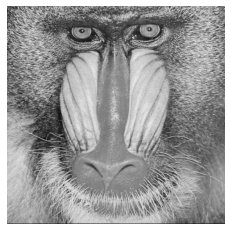

In [ ]:
#Conversión a grises de la original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises
#Eliminamos etiquetas de los ejes
plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de bordes multietapa. Tratado en el tema 4

[[  0 255   0 ...   0 255   0]
 [255 255   0 ...   0   0 255]
 [  0   0 255 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0 255]
 [  0 255 255 ... 255 255 255]
 [255   0   0 ...   0   0   0]]


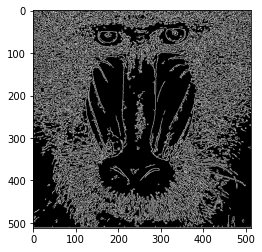

In [ ]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
print(canny)
#Muestra resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Definida la imagen de salida de Canny, salida 0 o 255, obtiene el número de píxeles no nulos por columna y visualiza

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Número máximo de píxeles blancos por fila: 406.0
Número máximo de píxeles blancos por columna: 191.0
Número de filas con más del 95% del máximo: 1
Número de columnas con más del 95% del máximo: 8


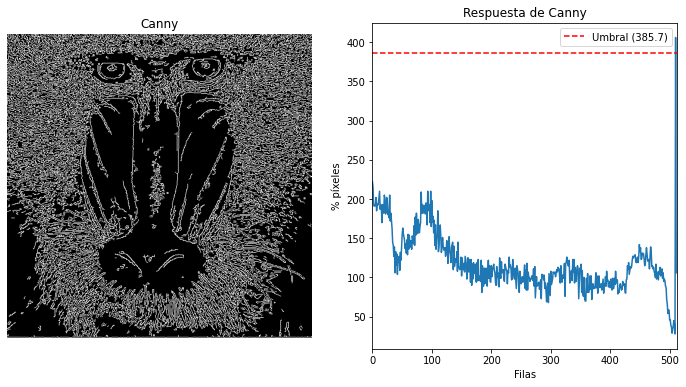

In [ ]:
# Cuenta el número de píxeles blancos (255) por columna
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al valor máximo del píxel (255)
# El resultado será el número de píxeles blancos por fila y columna
rows = row_counts[:, 0] / 255
cols = col_counts[0, :] / 255

# Encuentra el máximo número de píxeles blancos por fila y columna
max_row_value = np.max(rows)
max_col_value = np.max(cols)

# Calcula el umbral para considerar valores significativos (95% del máximo)
threshold_row = 0.95 * max_row_value
threshold_col = 0.95 * max_col_value

# Cuenta cuántos valores superan el umbral en filas y columnas
count_significant_rows = np.sum(rows > threshold_row)
count_significant_cols = np.sum(cols > threshold_col)

# Muestra los resultados
print(f"Número máximo de píxeles blancos por fila: {max_row_value}")
print(f"Número máximo de píxeles blancos por columna: {max_col_value}")
print(f"Número de filas con más del 95% del máximo: {count_significant_rows}")
print(f"Número de columnas con más del 95% del máximo: {count_significant_cols}")

# Muestra dichas cuentas gráficamente
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.axhline(y=threshold_row, color='r', linestyle='--', label=f"Umbral ({threshold_row})")
plt.legend()
plt.xlim([0, canny.shape[0]])
plt.show()




Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproximar el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1]

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

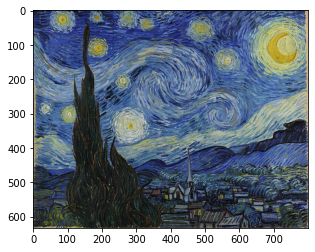

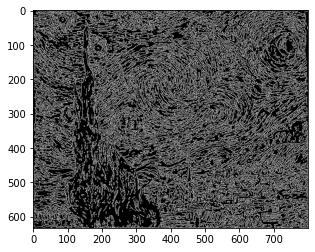

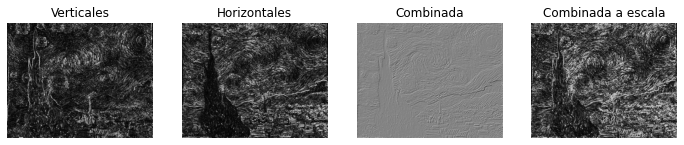

In [ ]:
img2 = cv2.imread('noche-estrellada.jpg') 
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#Muestra la imagen tras convertir a RGB
plt.imshow(img_rgb) 
plt.show()

#convertimos la imagen a grises
gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris2, 100, 200)
plt.imshow(canny, cmap='gray') 
plt.show()

# Gaussiana para suavizar la imagen original
ggris2 = cv2.GaussianBlur(gris2, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris2, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris2, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title('Verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 2)
plt.axis("off")
plt.title('Horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 3)
plt.axis("off")
plt.title('Combinada')

plt.imshow(sobel, cmap='gray') #Sin convertir escala

plt.subplot(1, 4, 4)
plt.axis("off")
plt.title('Combinada a escala')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
plt.show()



Umbralizado de una imagen

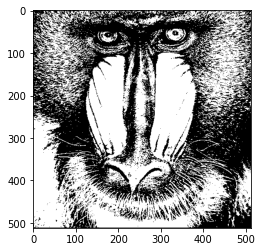

In [ ]:
#Define valor umbral
valorUmbral = 125 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones

(0.0, 256.0)

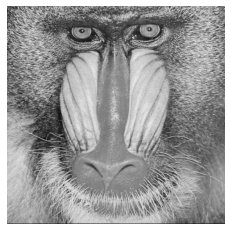

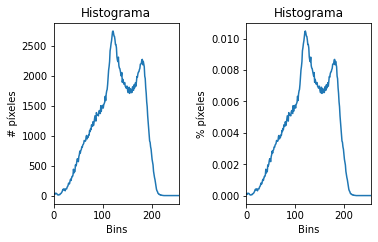

In [ ]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Número máximo de píxeles blancos por fila (Sobel): 513.0
Número máximo de píxeles blancos por columna (Sobel): 421.0
Filas con más del 95% del máximo (Sobel): [  1  11  13  22  23  32  41  51  52  80 248 255 312 328 335 386]
Columnas con más del 95% del máximo (Sobel): [  2   3   6   7 403 479 480]


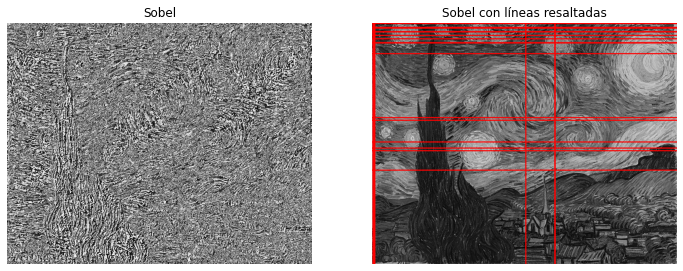

In [ ]:

# Carga la imagen en escala de grises
image = cv2.imread('noche-estrellada.jpg', cv2.IMREAD_GRAYSCALE)



#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris2, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris2, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Convierte la imagen de salida a 8 bits
sobel8 = np.uint8(sobel)

# Aplica umbralizado a la imagen de Sobel
threshold_value = 100  # Puedes ajustar este valor según tus necesidades
sobel_thresholded = cv2.threshold(sobel8, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Realiza el conteo por filas y columnas
row_counts = cv2.reduce(sobel_thresholded, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
col_counts = cv2.reduce(sobel_thresholded, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al valor máximo del píxel (255)
rows = row_counts[:, 0] / 255
cols = col_counts[0, :] / 255

# Encuentra el máximo número de píxeles blancos por fila y columna
max_row_value = np.max(rows)
max_col_value = np.max(cols)

# Calcula el umbral para considerar valores significativos (95% del máximo)
threshold_row = 0.95 * max_row_value
threshold_col = 0.95 * max_col_value

# Encuentra las filas y columnas por encima del umbral
significant_rows = np.where(rows > threshold_row)[0]
significant_cols = np.where(cols > threshold_col)[0]

# Crea una copia de la imagen para remarcar las filas y columnas
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Dibuja líneas rojas en las filas significativas
for row in significant_rows:
    cv2.line(image_with_lines, (0, row), (image_with_lines.shape[1], row), (0, 0, 255), 2)

# Dibuja líneas rojas en las columnas significativas
for col in significant_cols:
    cv2.line(image_with_lines, (col, 0), (col, image_with_lines.shape[0]), (0, 0, 255), 2)

# Muestra los resultados
print(f"Número máximo de píxeles blancos por fila (Sobel): {max_row_value}")
print(f"Número máximo de píxeles blancos por columna (Sobel): {max_col_value}")
print(f"Filas con más del 95% del máximo (Sobel): {significant_rows}")
print(f"Columnas con más del 95% del máximo (Sobel): {significant_cols}")

# Muestra la imagen con las líneas resaltadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel8, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Sobel con líneas resaltadas")
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()


Diferencia de imágenes

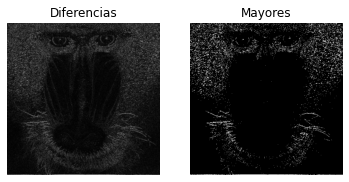

In [ ]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas

In [10]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo

In [ ]:
import cv2

vid = cv2.VideoCapture(0)

# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

# Inicializa el fotograma anterior
frame_anterior = None

while True:
    # Captura el fotograma actual
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem = cv2.flip(frame, 1)

        # Aplica la sustracción de fondo al fotograma actual
        objetos = eliminadorFondo.apply(framem)
        background = eliminadorFondo.getBackgroundImage()

        # Superponer una imagen en la región de detección (por ejemplo, un logotipo)
        if frame_anterior is not None:
            # Escala la imagen del logotipo para que coincida con el tamaño de la región de detección
            logo = cv2.imread('logo.png')  # Reemplaza 'logo.png' con tu propia imagen
            logo = cv2.resize(logo, (frame.shape[1], frame.shape[0]))  # Ajusta al tamaño del fotograma

            # Combinar el fotograma actual y el logotipo
            alpha = 0.5  # Controla la opacidad del logotipo (ajusta según sea necesario)
            blended_frame = cv2.addWeighted(frame, 1 - alpha, logo, alpha, 0)
            cv2.imshow('Superposición', blended_frame)
        else:
            cv2.imshow('Fotograma', objetos)

        # Actualizar el fotograma anterior
        frame_anterior = framem.copy()

    # Detener el bucle al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()

# Destruir ventanas
cv2.destroyAllWindows()


In [9]:
vid = cv2.VideoCapture(0)


# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=False)
  
tiempo_mantener_fotograma_anterior = 5
# Inicializa el fotograma anterior
frame_anterior = None

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        #objetos = eliminadorFondo.apply(framem)
        objetos = eliminadorFondo.apply(framem)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()
        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        
        if frame_anterior is not None:
            #objetos_ant = eliminadorFondo.apply(frame_anterior, objetos)
            #cv2.imshow('Fotograma Anterior', objetos_ant)
            # Muestra resultado
            cv2.imshow('Fotograma Anterior', frame_anterior)
             # Si ha pasado el tiempo de retención, comienza a difuminar el fotograma anterior
            if cv2.waitKey(20) & 0xFF == ord('q'):
                break  # Salir del bucle si presiona 'q'

            # Calcular la mezcla gradual entre el fotograma actual y el anterior
            alpha = 1.0 - (cv2.getTickCount() - start_time) / (cv2.getTickFrequency() * tiempo_mantener_fotograma_anterior)
            alpha = max(0, min(1, alpha))  # Asegurar que alpha esté en el rango [0, 1]
            blended_frame = cv2.addWeighted(frame_anterior, alpha, framem, 1 - alpha, 0)
            cv2.imshow('Fotograma Anterior', blended_frame)


        # Actualiza el fotograma anterior
        frame_anterior = framem.copy()
        start_time = cv2.getTickCount()
        
        # Muestra fondo
        #cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funcioens de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

In [3]:
def popart(video):

    vid = video

    #Dimensiones de la cámara
    w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

    #Fuerzo a mitad de resolución para ocupar menos pantalla
    w=int(w/2)
    h=int(h/2)
    vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
    vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

    #Imagen conjunta 2x original
    collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
    tl = collage[0:h,0:w]
    tr = collage[0:h,w:w+w]
    bl = collage[h:h+h,0:w]
    br = collage[h:h+h,w:w+w]

    lower = np.array([10, 20, 89]) #azul oscuro
    upper = np.array([120, 255, 255]) #azul claro

    while True:      
        # fotograma a fotograma
        ret, frameIN = vid.read()

        #Menor tamaño
        frame1 = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)    

        frame2 = cv2.inRange(frame1, lower, upper)

        frame = cv2.bitwise_not(frame2)
        #plt.imshow(mask) 
        if ret:
            #Separamos canales
            bgr_channels = cv2.merge([frame2, frame2 + 55, frame2])
            collage[0:h,0:w] = bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 55, frame2 - 76])
            collage[0:h,w:w+w] = bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 155, frame2 - 45])
            bl = collage[h:h+h,0:w]= bgr_channels

            bgr_channels = cv2.merge([frame2, frame2 + 175, frame2 + 75])
            br = collage[h:h+h,w:w+w] = bgr_channels

        
            # Muestra composicion
            cv2.imshow('Cam', collage)
        
        # Detenemos pulsado ESC
        if cv2.waitKey(20) == 27:
            break
  

name = "normal"
pframe = 0
vid = cv2.VideoCapture(0)
tecla = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    tecla2 = cv2.waitKey(10)
    if(tecla2 != -1): tecla = tecla2
    if ret:
        
        cv2.imshow('Cam', frame)
        # Muestra resultado
        if tecla == 50:
            tecla = popart(vid)


   
    # Detenemos pulsado ESC

    
    pframe = frame.copy()
    if tecla == 27:
        break


vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.